In [ ]:
pip install PyPDF2

In [ ]:
import pandas as pd
import PyPDF2
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pdfminer.six

In [ ]:
import os
from pdfminer.high_level import extract_text

# Path to the directory containing PDF files
directory = '/content/drive/Shareddrives/DATA 298A/Code/Data'

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    text = extract_text(pdf_path)
    return text

# Function to process all PDF files in the directory
def process_pdfs_in_directory(directory):
    pdf_texts = []
    for filename in os.listdir(directory):
        if filename.endswith('.pdf'):
            pdf_path = os.path.join(directory, filename)
            pdf_text = extract_text_from_pdf(pdf_path)
            pdf_texts.append(pdf_text)
    return pdf_texts

# Call the function to process PDFs in the directory
all_texts = process_pdfs_in_directory(directory)

# Now you have all the extracted text from the PDFs in the directory
# You can further process this text or save it to a file as per your requirement
# Calculate the total count of characters including whitespace
total_characters = sum(len(text) for text in all_texts)

print("Total count of characters (including whitespace):", total_characters)

Total count of characters (including whitespace): 2746664


In [ ]:
all_texts

['Page  47\n\nTITLE  15—COMMERCE  AND  TRADE\n\n§ 41\n\nStates  and  in  foreign  countries  and  to  reinsure \nor  otherwise  apportion  among  its  membership \nthe risks undertaken by such association or any \nof the component members. \n\nSec. \n57c–1. \n57c–2. \n58. \nSUBCHAPTER  II—PROMOTION  OF  EXPORT  TRADE \n\nStaff exchanges. \nReimbursement of expenses. \nShort title. \n\n(June 5, 1920, ch. 250, § 29, 41 Stat. 1000.)\n\nEditorial  Notes \n\nCODIFICATION \n\nSection was classified to section 885 of the former Ap-\npendix to Title 46, prior to the completion of the enact-\nment  of  Title  46,  Shipping,  by  Pub.  L.  109–304,  Oct.  6, \n2006, 120 Stat. 1485.\n\nCHAPTER  2—FEDERAL  TRADE  COMMISSION; \nPROMOTION  OF  EXPORT  TRADE  AND  PRE-\nVENTION  OF  UNFAIR  METHODS  OF  COM-\nPETITION \n\nSUBCHAPTER  I—FEDERAL  TRADE  COMMISSION \n\nSec. \n41. \n\n42. \n43. \n44. \n45. \n\n45a. \n45b. \n45c. \n\n45d. \n\nFederal Trade Commission established; mem-\n\nbership; vacancie

In [ ]:
import os
from PyPDF2 import PdfReader

# Path to the directory containing PDF files
directory = '/content/drive/Shareddrives/DATA 298A/Code/Data'

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PdfReader(file)
        text = ''
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
    return text

# Function to count words in a text
def count_words(text):
    words = text.split()
    return len(words)

# Function to process all PDF files in the directory and calculate total word count
def process_pdfs_in_directory(directory):
    total_word_count = 0
    for filename in os.listdir(directory):
        if filename.endswith('.pdf'):
            pdf_path = os.path.join(directory, filename)
            pdf_text = extract_text_from_pdf(pdf_path)
            total_word_count += count_words(pdf_text)
    return total_word_count

# Call the function to process PDFs in the directory and calculate total word count
total_word_count = process_pdfs_in_directory(directory)
print("Total Word Count:", total_word_count)

[0, IndirectObject(3177, 0, 138643304958320)]
[0, IndirectObject(3172, 0, 138643304958320)]
[0, IndirectObject(3157, 0, 138643304958320)]
[0, IndirectObject(3152, 0, 138643304958320)]
[0, IndirectObject(3147, 0, 138643304958320)]
[0, IndirectObject(3142, 0, 138643304958320)]
[0, IndirectObject(3137, 0, 138643304958320)]
[0, IndirectObject(3167, 0, 138643304958320)]
[0, IndirectObject(3162, 0, 138643304958320)]
[0, IndirectObject(3132, 0, 138643304958320)]
[0, IndirectObject(3127, 0, 138643304958320)]
[0, IndirectObject(3122, 0, 138643304958320)]


Total Word Count: 412788


In [ ]:
# Calculate the total count of characters
total_characters = sum(len(text) for text in all_texts)

print("Total count of characters:", total_characters)

Total count of characters: 2746664


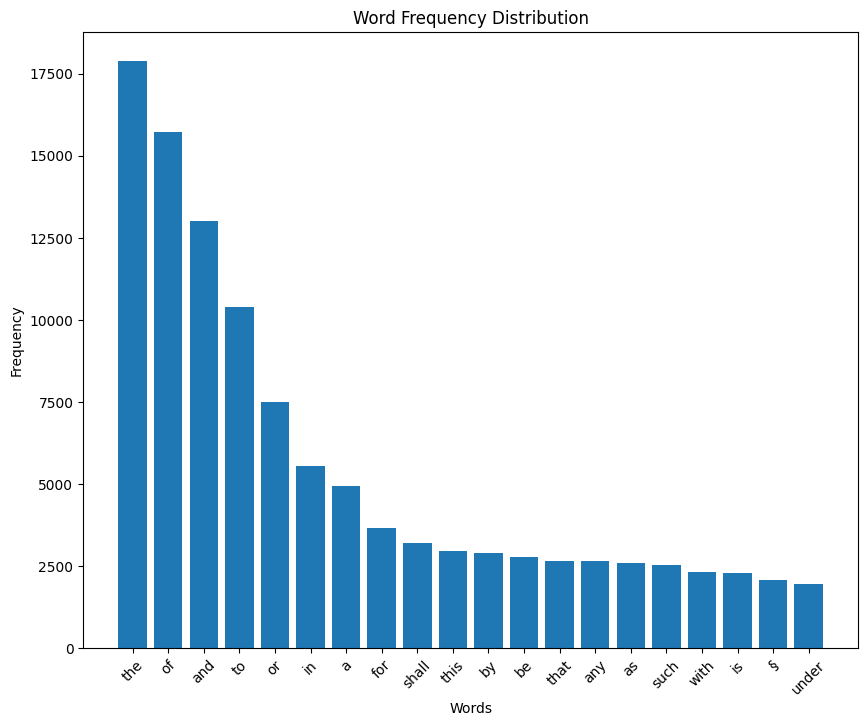

In [ ]:
# Combine all text strings into a single string
all_text_combined = ' '.join(all_texts)

# Tokenize the combined text by splitting on whitespace
words = all_text_combined.split()

# Calculate word frequencies
word_counts = Counter(words)

# Extracting words and their counts for visualization
words_to_plot, counts_to_plot = zip(*word_counts.most_common(20))  # You can adjust the number to display more or fewer words

# Creating the bar chart
plt.figure(figsize=(10, 8))
plt.bar(words_to_plot, counts_to_plot)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import re

# Function to count special characters
def count_special_characters(text):
    special_characters = re.findall(r'[^\w\s]', text)
    return len(special_characters)

# Function to count URLs
def count_urls(text):
    urls = re.findall(r'https?:\/\/.[\r\n]', text)
    return len(urls)

# Function to count HTML link tags
def count_html_links(text):
    html_links = re.findall(r'\<a href', text)
    return len(html_links)

# Function to count punctuation marks
def count_punctuation_marks(text):
    punctuation_marks = re.findall(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', text)
    return len(punctuation_marks)

# Function to count HTML line break tags
def count_html_line_breaks(text):
    html_line_breaks = re.findall(r'<br />', text)
    return len(html_line_breaks)

# Function to count single quotation marks
def count_single_quotation_marks(text):
    single_quotation_marks = re.findall(r'\'', text)
    return len(single_quotation_marks)

# Initialize counts
special_characters_count = 0
urls_count = 0
html_links_count = 0
punctuation_marks_count = 0
html_line_breaks_count = 0
single_quotation_marks_count = 0

# Count occurrences of each pattern for each text in all_texts
for text in all_texts:
    special_characters_count += count_special_characters(text)
    urls_count += count_urls(text)
    html_links_count += count_html_links(text)
    punctuation_marks_count += count_punctuation_marks(text)
    html_line_breaks_count += count_html_line_breaks(text)
    single_quotation_marks_count += count_single_quotation_marks(text)

# Printing the counts
print("Special Characters Count:", special_characters_count)
print("URLs Count:", urls_count)
print("HTML Links Count:", html_links_count)
print("Punctuation Marks Count:", punctuation_marks_count)
print("HTML Line Breaks Count:", html_line_breaks_count)
print("Single Quotation Marks Count:", single_quotation_marks_count)


Special Characters Count: 123281
URLs Count: 0
HTML Links Count: 0
Punctuation Marks Count: 106830
HTML Line Breaks Count: 0
Single Quotation Marks Count: 36


Top 10 Special Characters:
.: 33860
,: 29907
): 11747
(: 11728
-: 11113
’: 4586
‘: 3766
;: 2431
§: 2405
/: 2016


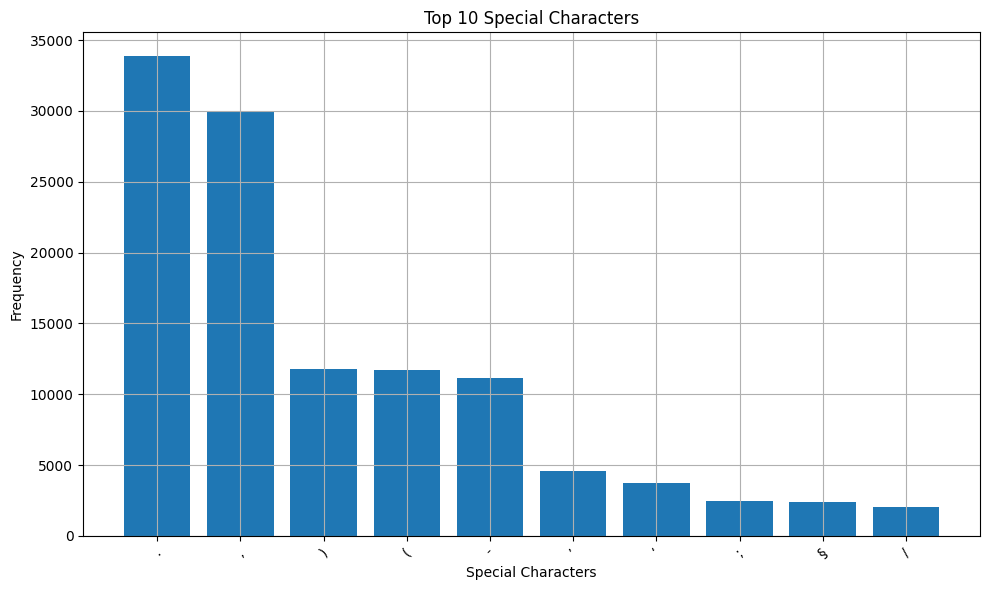

In [ ]:
import re
import matplotlib.pyplot as plt

# Combine all text strings into a single string
all_text_combined = ' '.join(all_texts)

# Extracting all special characters from the text
special_characters = re.findall(r'[^a-zA-Z0-9\s]', all_text_combined)

# Counting the frequency of each special character
character_counts = {}
for char in special_characters:
    if char in character_counts:
        character_counts[char] += 1
    else:
        character_counts[char] = 1

# Sorting the characters by frequency
sorted_characters = sorted(character_counts.items(), key=lambda x: x[1], reverse=True)

# Selecting the top 10 special characters
top_characters = sorted_characters[:10]
chars, counts = zip(*top_characters)

# Printing descriptive results
print("Top 10 Special Characters:")
for char, count in top_characters:
    print(f"{char}: {count}")

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(chars, counts)
plt.xlabel('Special Characters')
plt.ylabel('Frequency')
plt.title('Top 10 Special Characters')
plt.xticks(rotation=45)
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
!pip install reportlab


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.7 MB/s eta 0:00:00


In [ ]:
from reportlab.pdfgen import canvas
from google.colab import files

# Path to save the PDF file
pdf_file_path = '/content/drive/Shareddrives/DATA 298A/Code/all_texts.pdf'

# Create a canvas
c = canvas.Canvas(pdf_file_path)

# Set font
c.setFont("Helvetica", 12)

# Add text to PDF
y_position = 800  # Starting y position
line_height = 14  # Line height
for text in all_texts:
    c.drawString(10, y_position, text)
    y_position -= line_height

# Save the PDF file
c.save()

# Download the PDF file
files.download(pdf_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Install the required dependencies to establish connection**

In [ ]:
!pip install -q cassio datasets langchain openai tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.0/383.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2

In [ ]:
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.4 MB/s eta 0:00:00


In [ ]:
# LangChain components to use
from langchain.vectorstores.cassandra import Cassandra
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
from langchain.llms import OpenAI
from langchain.embeddings import OpenAIEmbeddings

# Support for dataset retrieval with Hugging Face
from datasets import load_dataset

# With CassIO, the engine powering the Astra DB integration in LangChain,
# you will also initialize the DB connection:
import cassio

In [ ]:
!pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.5 MB/s eta 0:00:00


In [ ]:
from PyPDF2 import PdfReader

In [ ]:
ASTRA_DB_APPLICATION_TOKEN = "" # enter the "AstraCS:..." string found in in your Token JSON file
ASTRA_DB_ID = "" # enter your Database ID

In [ ]:
OPENAI_API_KEY = "" # enter your OpenAI key

In [ ]:
with open('/content/drive/Shareddrives/DATA 298A/Code/Output- Preprocessed Data/Combined_Content_From_PDF.txt', 'r', encoding='utf-8') as file:
    content = file.read()

In [ ]:
pages = content.split("\f")

In [ ]:
# Initialize an empty string to store concatenated text
raw_text = ''

# Iterate over each "page" and concatenate the content
for i, page_content in enumerate(pages):
    if page_content.strip():  # Check if the page has any content
        raw_text += page_content + "\n"

**Initialize the connection to your database:**

In [ ]:
cassio.init(token=ASTRA_DB_APPLICATION_TOKEN, database_id=ASTRA_DB_ID)

**Create the LangChain embedding and LLM objects for later usage:**

In [ ]:
llm = OpenAI(openai_api_key=OPENAI_API_KEY, model = "gpt-4o-mini")
embedding = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)

<ipython-input-17-8ed11deaa652>:1: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  llm = OpenAI(openai_api_key=OPENAI_API_KEY, model = "gpt-4o-mini")
<ipython-input-17-8ed11deaa652>:2: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embedding = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)


**Create your LangChain vector store**

In [ ]:
astra_vector_store = Cassandra(
    embedding=embedding,
    table_name="OpenAI",
    session=None,
    keyspace=None,
)
print("Table Data Source created succeffully") # commenting the above as the Data_source table is created in AstraDB

Table Data Source created succeffully


In [ ]:
from langchain.text_splitter import CharacterTextSplitter
# We need to split the text using Character Text Split such that it should not increse token size
text_splitter = CharacterTextSplitter(
    separator = "\n",
    chunk_size = 512,
    chunk_overlap  = 150,
    length_function = len,
)
texts = text_splitter.split_text(raw_text)


**Load the dataset into the vector store**

In [ ]:
astra_vector_store.add_texts(texts)

print("Number of headline inserted in AstraDB",  len(texts))

astra_vector_index = VectorStoreIndexWrapper(vectorstore=astra_vector_store)

Number of headline inserted in AstraDB 282


In [ ]:
print(texts)

['Case\n1:20-cv-03590-JEB Document 51 Filed 01/13/21 Page 1 of 53  IN THE UNITED STATES\nDISTRICT COURT  FOR THE DISTRICT OF COLUMBIA  FEDERAL TRADE COMMISSION  600\nPennsylvania Avenue, N.W.  Washington, DC 20580  Plaintiff,  v.  FACEBOOK, INC.  1601\nWillow Road  Menlo Park, CA 94025  Defendant. Case No.: 1:20-cv-03590  PUBLIC\nREDACTED VERSION OF  DOCUMENT FILED UNDER SEAL  COMPLAINT FOR INJUNCTIVE AND OTHER EQ', 'REDACTED VERSION OF  DOCUMENT FILED UNDER SEAL  COMPLAINT FOR INJUNCTIVE AND OTHER EQ\nUITABLE RELIEF  Plaintiff, the Federal Trade Commission (“FTC”) , by its designated\nattorneys, petition s this  Court pursuant to Section 13(b) of the Federal Trade\nCommission Act (“FTC Act”), 15 U.S.C.  § 53(b), for a permanent injunction and other\nequitable relief against Defendant Facebook, Inc.  (“Facebook”), to undo and prevent\nits anticompetitive conduct and unfair methods of competition  in or affecting', 'its anticompetitive conduct and unfair methods of competition  in or af

In [ ]:
first_question = True
while True:
    if first_question:
        query_text = input("\nEnter your question (or type 'quit' to exit): ").strip()
    else:
        query_text = input("\nWhat's your next question (or type 'quit' to exit): ").strip()

    if query_text.lower() == "quit":
        break

    if query_text == "":
        continue

    first_question = False

    print("\nQUESTION: \"%s\"" % query_text)
    answer = astra_vector_index.query(query_text, llm=llm).strip()
    print("ANSWER: \"%s\"\n" % answer)

    print("FIRST DOCUMENTS BY RELEVANCE:")
    for doc, score in astra_vector_store.similarity_search_with_score(query_text, k=4):
        print("    [%0.4f] \"%s ...\"" % (score, doc.page_content[:300]))#showcases only the first 84 characters of the document's content"""

KeyboardInterrupt: Interrupted by user

**Code as the table already exists**

In [ ]:
from langchain.chat_models import ChatOpenAI  # Use ChatOpenAI to handle GPT-4o-mini

# Create OpenAI chat-based LLM object with GPT-4o-mini
llm = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model="gpt-4o-mini")  # Use ChatOpenAI for chat-based GPT-4o-mini


<ipython-input-23-26ce7834e243>:4: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model="gpt-4o-mini")  # Use ChatOpenAI for chat-based GPT-4o-mini


In [ ]:
# Ensure all required libraries are installed
!pip install -q cassio langchain openai

from langchain.vectorstores.cassandra import Cassandra
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
from langchain.chat_models import ChatOpenAI  # Updated import for chat models

# Astra DB connection details
ASTRA_DB_APPLICATION_TOKEN = ""
ASTRA_DB_ID = ""
OPENAI_API_KEY = ""

# Initialize Astra DB connection
import cassio
cassio.init(token=ASTRA_DB_APPLICATION_TOKEN, database_id=ASTRA_DB_ID)

# Create OpenAI chat-based LLM object using GPT-4o-mini
llm = ChatOpenAI(openai_api_key=OPENAI_API_KEY, model="gpt-4o-mini")  # Using ChatOpenAI for chat-based models like GPT-4o-mini

# Connect to existing vector store in Astra DB
astra_vector_store = Cassandra(
    embedding=OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY),
    table_name="OpenAI",  # Assuming the table is already created in Astra DB
    session=None,  # Leave session to None as it's handled internally
    keyspace=None, # Provide your keyspace name if needed
)

# Wrap vector store for easy query access
astra_vector_index = VectorStoreIndexWrapper(vectorstore=astra_vector_store)

# Begin user interaction for question answering
first_question = True
while True:
    if first_question:
        query_text = input("\nEnter your question (or type 'quit' to exit): ").strip()
    else:
        query_text = input("\nWhat's your next question (or type 'quit' to exit): ").strip()

    if query_text.lower() == "quit":
        break

    if query_text == "":
        continue

    first_question = False

    print("\nQUESTION: \"%s\"" % query_text)
    answer = astra_vector_index.query(query_text, llm=llm).strip()
    print("ANSWER: \"%s\"\n" % answer)

    print("FIRST DOCUMENTS BY RELEVANCE:")
    for doc, score in astra_vector_store.similarity_search_with_score(query_text, k=4):
        print("    [%0.4f] \"%s ...\"" % (score, doc.page_content[:300]))



Enter your question (or type 'quit' to exit): can u give me a summary of the case for ftc vs facebook

QUESTION: "can u give me a summary of the case for ftc vs facebook"


ANSWER: "The case involves the Federal Trade Commission (FTC) filing a complaint against Facebook, Inc. for violating antitrust laws. The FTC alleges that Facebook's conduct constitutes an unfair method of competition in violation of the Sherman Act and the FTC Act. The main points of the complaint include:

1. Facebook's actions are deemed to violate Section 2 of the Sherman Act.
2. The FTC is seeking a divestiture of assets and a restructuring of Facebook's businesses, including Instagram and WhatsApp.
3. The FTC requests a permanent injunction to prevent Facebook from engaging in similar conduct in the future.
4. The company would be required to file periodic compliance reports with the FTC and adhere to monitoring obligations.
5. The FTC seeks any other equitable relief deemed necessary to address and prevent recurrence of Facebook's alleged violations.

The case aims to undo and prevent Facebook's anticompetitive behavior."

FIRST DOCUMENTS BY RELEVANCE:


    [0.9248] "Section 13(b) of the  FTC Act, 15 U.S.C. § 53(b), and pursuant to its own equitable
powers, enter final judgment against Facebook, declaring, ordering, and adjudging:
A. that Facebook’s course of conduct, as alleged herein, violates Section 2 of the
Sherman Act and thus constitutes an unfair method  ..."
    [0.9211] "described herein;  G. that Facebook is permanently enjoined from engaging in similar
or related conduct in the future;  H. a requirement to file periodic compliance
reports with the FTC, and to submit to such reporting and monitoring obligations as
may be reasonable and appropriate; and  I. any othe ..."
    [0.9208] "33. Facebook is, and at all relevant times has been, a corporation, as the term
“corporation” is defined in Section 4 of the FTC Act, 15 U.S.C. § 44.  B. Venue  34.
Venue in this district is proper under 15 U.S.C. § 22, 28 U.S.C. § 1391(b)(1) , and
15 U.S.C. § 53(b).  Facebook resides, transacts bus ..."
    [0.9190] "REDACTED VERSION OF  DOCUM

ANSWER: "I don't know."

FIRST DOCUMENTS BY RELEVANCE:


    [0.8603] "threatened to increase its  scale in mobile messaging in the United States as it had
already done in Europe and elsewhere.  One executive wrote to Mr. Zuckerberg on
August 8, 2013:  “ [I] am really worried  . . . these guys  [WhatsApp] are the real
deal!”  He continued: “With the window of opportuni ..."
    [0.8593] "that a personal social networking competitor would emerge using mobile  photo-
sharing.  For example, in an email dated April 23, 2012, a Facebook business
development  manager wrote to colleagues that he was unconcerned about the apps
Camera+ and Hipstamatic  because, among other things, “Instagram ..."
    [0.8592] "per day.  Moreover, users can also share locations, places, and communicate 1 -to-1
or 1- to-many.  Given this  37
Case 1:20-cv-03590-JEB Document 51 Filed 01/13/21 Page 38 of 53  functionality by
WhatsApp and the focus of Facebook on communication and  linking the world’s
population, we think Whats ..."
    [0.8590] "33
Case 1:20-cv-03590-JEB 

ANSWER: "The violated laws mentioned in the context are Section 2 of the Sherman Act, which pertains to monopolization, and Section 5(a) of the FTC Act, which addresses unfair methods of competition."

FIRST DOCUMENTS BY RELEVANCE:


    [0.8808] "violated these conditions by cut ting off their use of commercially significant  APIs
, hindering their ability to develop into stronger competitive threats to Facebook
Blue.  137. These actions, individually and in the aggregate, have suppressed the
ability and  incentive of apps in the Facebook ec ..."
    [0.8745] "First, the public announcement and  enforcement of the policies changed the
incentives of software developers, deterring them from  developing features and
functionalities that would present a competitive threat to Facebook, or  from working
with other platforms that compete with Facebook.  Second,  ..."
    [0.8722] "users).  168. Facebook cannot establish business justifications or procompetitive
benefits in any  relevant market to justif y its unlawful and anticompetitive conduct
to maintain its personal social  networking monopoly.  49
Case 1:20-cv-03590-JEB Document 51 Filed 01/13/21 Page 50 of 53  IX.  VIOL ..."
    [0.8717] "Section 13(b) of the  FTC 